# test

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

## Data load

- 백화점 고객의 1년 간 구매 데이터이다.
- custid: 고객 ID   * gender: 고객의 성별 (0: 여자, 1: 남자)

In [2]:
X=pd.read_csv('./X_train.csv',encoding='cp949')

In [27]:
y=pd.read_csv('./y_train.csv')

In [4]:
y.head(1)

,cust_id,gender
0,0,0


In [5]:
X.head(1)

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17


In [6]:
X['환불금액'][X['환불금액'].isna()]=0

In [7]:
X['주구매상품']=X['주구매상품'].astype('category')
X['주구매지점']=X['주구매지점'].astype('category')

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cust_id  3500 non-null   int64   
 1   총구매액     3500 non-null   int64   
 2   최대구매액    3500 non-null   int64   
 3   환불금액     3500 non-null   float64 
 4   주구매상품    3500 non-null   category
 5   주구매지점    3500 non-null   category
 6   내점일수     3500 non-null   int64   
 7   내점당구매건수  3500 non-null   float64 
 8   주말방문비율   3500 non-null   float64 
 9   구매주기     3500 non-null   int64   
dtypes: category(2), float64(3), int64(5)
memory usage: 227.8 KB


In [9]:
X1=pd.get_dummies(X)

In [28]:
y=y.drop('cust_id',axis=1)

In [30]:
df=pd.concat([X,y],axis=1)
df.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,0


In [12]:
df['주구매상품']=df['주구매상품'].astype('category').cat.codes
df['주구매지점']=df['주구매지점'].astype('category').cat.codes

<AxesSubplot: >

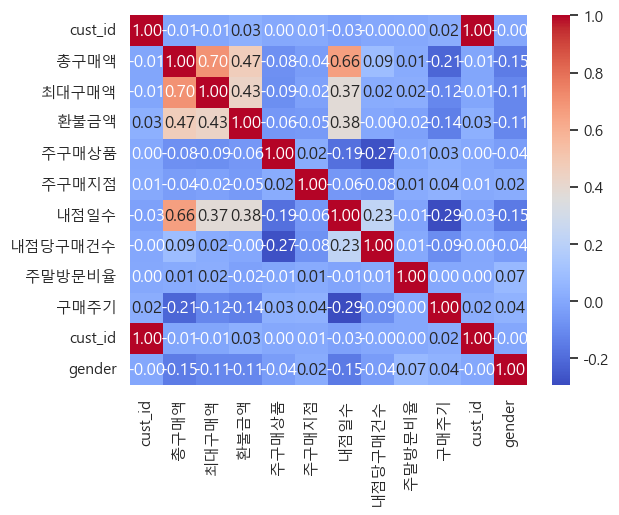

In [13]:
sns.heatmap(df.corr(),annot=True, fmt=".2f",cmap="coolwarm")

In [14]:
df.iloc[0]

cust_id    0.000000e+00
총구매액       6.828284e+07
최대구매액      1.126400e+07
환불금액       6.860000e+06
주구매상품      5.000000e+00
주구매지점      0.000000e+00
내점일수       1.900000e+01
내점당구매건수    3.894737e+00
주말방문비율     5.270270e-01
구매주기       1.700000e+01
cust_id    0.000000e+00
gender     0.000000e+00
Name: 0, dtype: float64

In [15]:
df['환불금액'][df['환불금액'].isna()]=0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     3500 non-null   float64
 4   주구매상품    3500 non-null   int8   
 5   주구매지점    3500 non-null   int8   
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
 10  cust_id  3500 non-null   int64  
 11  gender   3500 non-null   int64  
dtypes: float64(3), int64(7), int8(2)
memory usage: 280.4 KB


In [17]:
idx_w=df[df['gender']==0].index.values
idx_m=df[df['gender']==1].index.values

In [18]:
df.groupby('주구매지점')['환불금액'].nlargest(1)

주구매지점      
0      2049    350514400.0
1      2847    167125420.0
2      1528    252437500.0
3      3198    563753000.0
4      1493     42550000.0
5      3417    355115160.0
6      2360    122868000.0
7      2953    119676000.0
8      214     381521000.0
9      3488    529602320.0
10     2315     68368000.0
11     1314    170391000.0
12     1848      4000000.0
13     1991     10095000.0
14     565       8970000.0
15     2187    231548000.0
16     2369    231667000.0
17     796     256107000.0
18     674     161372000.0
19     2839    257891700.0
20     3476      2314000.0
21     151             0.0
22     1657    153190000.0
23     1802      2468000.0
Name: 환불금액, dtype: float64

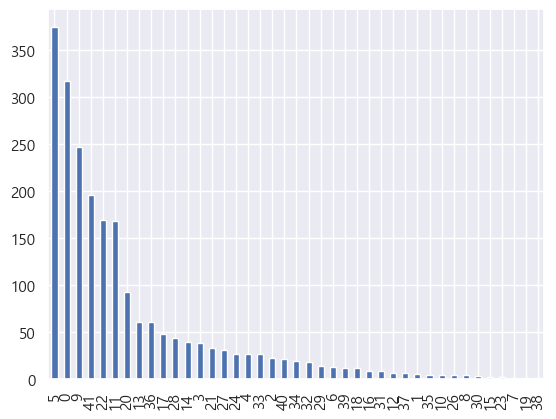

In [19]:
df.loc[idx_w]['주구매상품'].value_counts().plot(kind='bar')
plt.tight_layout
plt.show()

<AxesSubplot: >

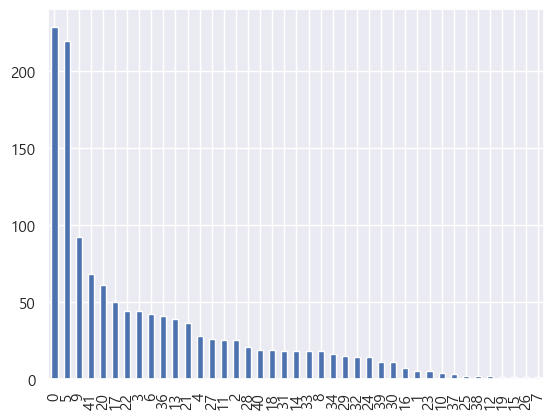

In [20]:
df.loc[idx_m]['주구매상품'].value_counts().plot(kind='bar')

In [39]:
df.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,0


## 1. 고객 3,500명에 대한 학습용 데이터를 이용해 예측모형을 구축하시오
- 모델의 성능은 mse 평가지표에 따라 채점
- train : 3000명 test : 500명
- 화점 고객의 1년 간 구매 데이터이다.
- custid: 고객 ID
- gender: 고객의 성별 (0: 여자, 1: 남자)

In [22]:
y_train=y['gender'][:3000]
y_test=y['gender'][3000:]

X_train=X1[:3000]
X_test=X1[3000:]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,accuracy_score


dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
score=mean_squared_error(y_pred,y_test)
score1=accuracy_score(y_pred,y_test)
score,score1

(0.432, 0.568)